![HACKTIV8](datasets/h8.png)

---
# Capstone Project 1

Nama Anggota:
  1. Oktaviani (PYTN-KS16-002)
  2. Gladis Hafifah (PYTN-KS16-001)
  3. Muhammad Rayhan Assegaf (PYTN-KS16-022)
---

## Introduction
"Uber and Lyft Dataset in Boston, Massachusetts" adalah sebuah kumpulan data yang berisikan informasi tentang pemesanan transportasi online yang menggunakan layanan Uber dan Lyft yang terjadi di wilayah kota boston, Massachussets, selaman preiode waktu November dan Desember tahun 2018. Datasets ini mencangkup ribuan perjalanan, pola mobilitas perkotaan, preferensi pengguna, dan statistik operasional dari layanan ride-shareing tersebut. Dataset ini bisa membantu pemahaman mengenai bagaimana layanan uber dan lyft dapat beroperasi pada lingkungan perkotaan. Dataset ini diperoleh dari platform Kaggle.

Dataset tersebut mencakup 693071 entries, yang mewakili perjalanan yang dilakukan oleh pengguna Uber dan Lyft, serta 57 atribut yang menggambarkan berbagai aspek dari perjalanan tersebut. Namun, dari 57 atribut tersebut, hanya 10 atribut yang dianggap paling relevan atau penting dalam analisis yang sedang dilakukan. Ini menunjukkan bahwa tidak semua atribut dalam dataset ini memiliki dampak yang sama dalam menjelaskan pola dan karakteristik perjalanan.

This dataset contains:
- id: Unique identifier for each column.
- timestamp: unix timestamp.
- hour: time the online transportation was booked.
- day: date the online transportation was booked.
- month: month the online transportation was booked.
- datetime: the date, month year and hour when the transportation was booked.
- timezone: the time zone when the transportation was booked.
- source: passenger pickup point.
- destination: the passenger's destination point.
- cab_type: type of online transportation.
- product_id: online transportation service.
- price: the price of the ride (US dollars).

### Objective
1. Untuk mengetahui faktor yang mempengaruhi dalam prediksi tarif harga.
2. memberikan insight yang dapat membantu pengguna atau company dalam bentuk visualisasi.
3. menentukan akurasi pada algoritma yang digunakan untuk membantu dalam memprediksi tarif harga.

---
---

## Import Library

In [4]:
# Import pustaka yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Data Loading

In [5]:
df = pd.read_csv('datasets/rideshare_kaggle.csv')

In [6]:
pd.set_option('display.max.columns', None)
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [7]:
df.tail(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [8]:
df.shape

(693071, 57)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [10]:
df.columns.values

array(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperat

In [11]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

---
## Data Cleaning

In [12]:
#mengecheck data dari masing masing atribut apakah terdapat missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Pada hasil tersebut, terdapat nilai yang hilang pada atribut price sebesar 55095, dikarenakan nilai yang hilang cukup banyak jadi kita tidak bisa sembarangan menghapusnya, maka dari itu kami mengatasinya dengan mengisi nilai yang hilang menggunakan nilai rata-rata(mean) dari atribut price.

In [13]:
df['price'].fillna(df['price'].mean(), inplace=True)

In [14]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [15]:
df.duplicated().sum()

0

Setelah melakukan penggantian pada nilai-nilai yang hilang, maka kami memastikan kembali apakah masih terdapat nilai yang hilang atau data yang ganda, setelah data sudah terbebas dari missing value dan data duplikat, langkah selanjutnya yaitu memilih atribut yang akan digunakan, hal tersebut dilakukan karena atribut yang tersedia terlalu banyak dan terdapat beberapa yang tidak relevan.

In [16]:
col_used = ['hour', 'day', 'month', 'datetime', 'cab_type', 'name', 'source', 'destination', 'distance', 'price', 'temperature', 'short_summary', 'surge_multiplier']
data = df[col_used]
data.head(3)

,hour,day,month,datetime,cab_type,name,source,destination,distance,price,temperature,short_summary,surge_multiplier
0,9,16,12,2018-12-16 09:30:07,Lyft,Shared,Haymarket Square,North Station,0.44,5.0,42.34,Mostly Cloudy,1.0
1,2,27,11,2018-11-27 02:00:23,Lyft,Lux,Haymarket Square,North Station,0.44,11.0,43.58,Rain,1.0
2,1,28,11,2018-11-28 01:00:22,Lyft,Lyft,Haymarket Square,North Station,0.44,7.0,38.33,Clear,1.0


In [17]:
#Mengganti nama atribut
data.rename(columns={
    'cab_type':'company',
    'name':'service',
    'short_summary': 'weather'}, inplace=True
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38488\3245873331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={


In [18]:
#menambahkan atribut
data['route'] = data['source'] + '-' + data['destination']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38488\1842769662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['route'] = data['source'] + '-' + data['destination']


In [19]:
data.head(3)

,hour,day,month,datetime,company,service,source,destination,distance,price,temperature,weather,surge_multiplier,route
0,9,16,12,2018-12-16 09:30:07,Lyft,Shared,Haymarket Square,North Station,0.44,5.0,42.34,Mostly Cloudy,1.0,Haymarket Square-North Station
1,2,27,11,2018-11-27 02:00:23,Lyft,Lux,Haymarket Square,North Station,0.44,11.0,43.58,Rain,1.0,Haymarket Square-North Station
2,1,28,11,2018-11-28 01:00:22,Lyft,Lyft,Haymarket Square,North Station,0.44,7.0,38.33,Clear,1.0,Haymarket Square-North Station


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              693071 non-null  int64  
 1   day               693071 non-null  int64  
 2   month             693071 non-null  int64  
 3   datetime          693071 non-null  object 
 4   company           693071 non-null  object 
 5   service           693071 non-null  object 
 6   source            693071 non-null  object 
 7   destination       693071 non-null  object 
 8   distance          693071 non-null  float64
 9   price             693071 non-null  float64
 10  temperature       693071 non-null  float64
 11  weather           693071 non-null  object 
 12  surge_multiplier  693071 non-null  float64
 13  route             693071 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 74.0+ MB


In [21]:
#menghitung nilai unique
data.nunique()

hour                   24
day                    17
month                   2
datetime            31350
company                 2
service                13
source                 12
destination            12
distance              549
price                 148
temperature           308
weather                 9
surge_multiplier        7
route                  72
dtype: int64

In [22]:
data.shape

(693071, 14)

Setelah mengatasi missing value, mengecheck data duplikat, mengambil beberapa atribut yang relevan, serta menambahkan 1 atribut yang merupakan gabungan dari atribut source dan atribut destination, kini jumlah data sementara berkisar 693071 entries dan 14 atribut. Berikutnya lakukan pengecheckan apakah terdapat data outlier pada atribut price!

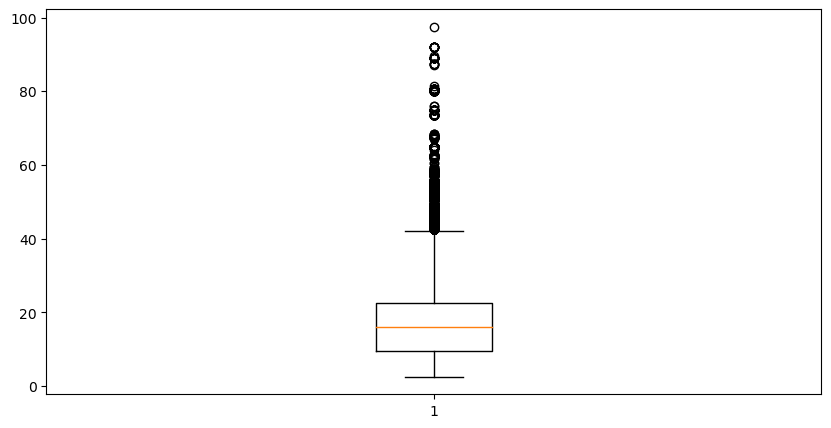

In [23]:
#melakukan pengecheckan outlier
plt.figure(figsize=(10,5))
plt.boxplot(data['price'])
plt.show()

In [24]:
Q1 = data['price'].quantile(0.25) #niai quartil pertama 25% percentile
Q3 = data['price'].quantile(0.75) #nilai quartil ketiga 75% percentile

IQR = Q3 - Q1 # jangkauan antara Q3 dan Q1 yang mencakup (middle 50%)
lower = Q1 - 1.5*IQR #menentukan batas bawah untuk mengidentifikasi outliers  yang dihitung dengan mengurangkan 1.5 kali IQR dari Q1
upper = Q3 + 1.5*IQR #menentukan batas atas untuk mengidentifikasi outliers yang dihitung dengan menambahkan 1.5 kali IQR dari Q3

print((data['price'] < lower).sum()) #menghitung jumlah data di bawah batas bawah
print((data['price'] > upper).sum()) #menghitung jumlah data di atas batas atas

0
7982


In [25]:
new_data = data[(data['price']>lower) & (data['price'] < upper)]
print((new_data['price'] > upper).sum())

0


In [26]:
new_data.shape

(684866, 14)

berdasarkan hasil yang telah didapatkan, terdapat data oulier sebesar 7982 entries, data yang termasuk kedalam outlier dapat dihapus, maka total data yang telah siap digunakan yaitu 684866 entries dan 14 atribut.

---

## Exploring Data Analysis (EDA)

In [27]:
#Menghitung jumlah total pengguna dari masing-masing company.
total = new_data['company'].value_counts()
print(total)

Uber    383691
Lyft    301175
Name: company, dtype: int64


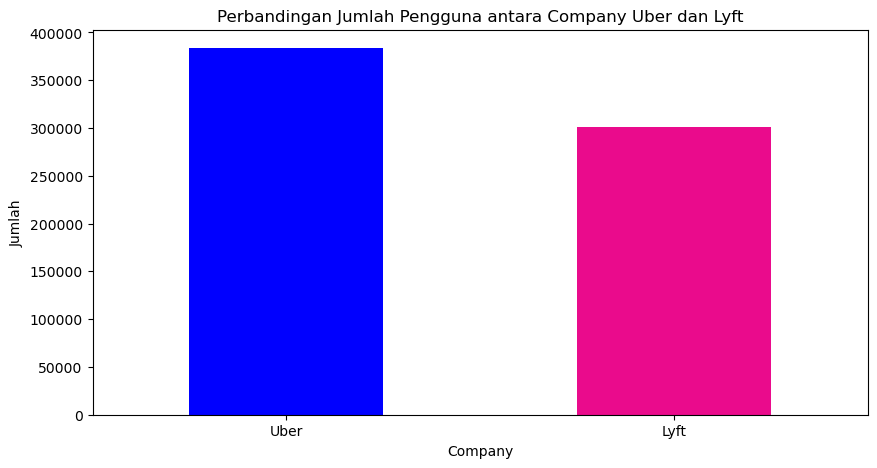

In [28]:
#Menampilkan visualisasi perbandingan jumlah pengguna dari masing masing company
total.plot(kind='bar', figsize=(10, 5), color=['blue', '#EA0B8C'])
plt.title('Perbandingan Jumlah Pengguna antara Company Uber dan Lyft')
plt.xlabel('Company')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.show()

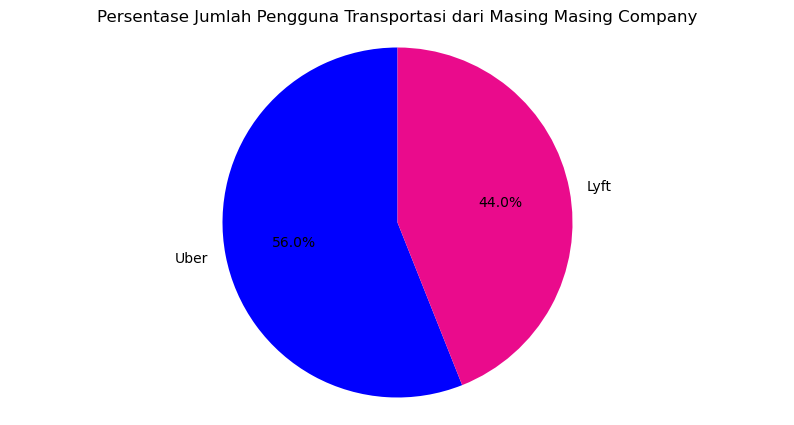

In [29]:
#Menampilkan visual persentase dari total pengguna
plt.figure(figsize=(10,5))
plt.pie(total, labels=total.index, colors=['blue', '#EA0B8C'], autopct='%1.1f%%', startangle=90)
plt.title('Persentase Jumlah Pengguna Transportasi dari Masing Masing Company')
plt.axis('equal')

plt.show()

**Insight:**

- Jumlah pengguna uber 56% atau sekitar 383691 penumpang dari total pengguna.
- Jumlah pengguna lyft hanya 44% atau sebanyak 301175 penumpang dari total pengguna.
- Dari kedua visualisasi tersebut sudah jelas bahwa uber lebih mendominasi dibandingkan dengan lyft.

---

In [30]:
#Menghitung jumlah layanan(Service) dari setiap company
data_service = pd.DataFrame(new_data.groupby(['company'])['service'].value_counts())
data_service

service
company service              
Lyft    Lyft            51235
        Shared          51233
        Lyft XL         51156
        Lux             51055
        Lux Black       50460
        Lux Black XL    46036
Uber    Taxi            55095
        WAV             55095
        UberX           55093
        UberPool        55090
        UberXL          55023
        Black           54991
        Black SUV       53304

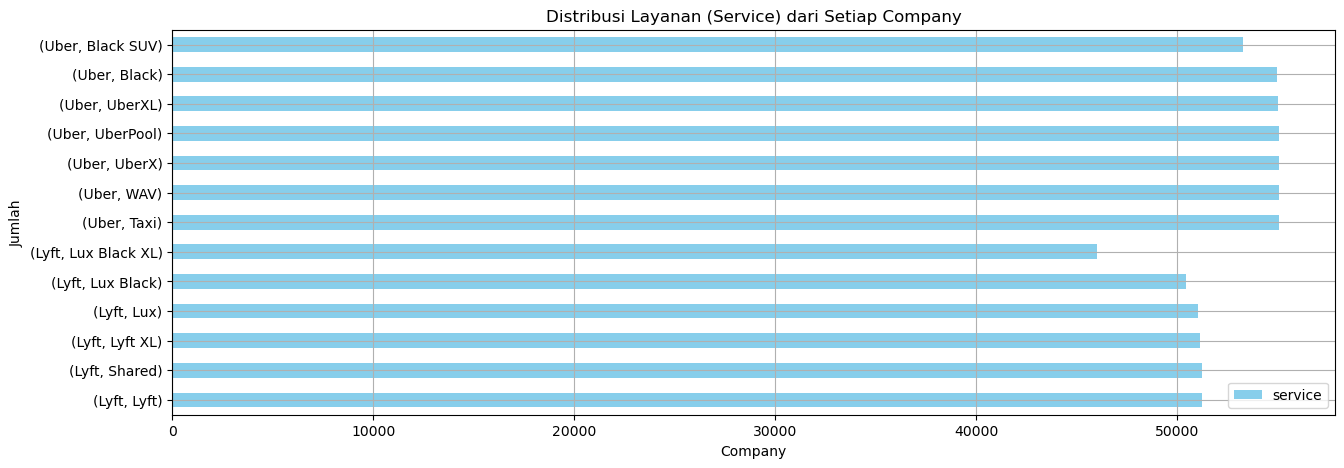

In [31]:
#Visualisasi untuk mengetahui distribusi layanan(Service) dari setiap company
data_service.plot(kind='barh', figsize=(15, 5), color='skyblue')
plt.title('Distribusi Layanan (Service) dari Setiap Company')
plt.ylabel('Jumlah')
plt.xlabel('Company')
plt.grid(True)
plt.xticks(rotation=0)

plt.show()

**Insight:** 

- Pada company uber, layanan transportasi yang sering dipesan yaitu Uber taxi dan Uber WAV sebesar 55095 sedangkan layanan transpoertasi yang paling sedikit dipesan pada company uber yaitu Uber Black SUV sebanyak 53304.
- Pada company Lyft, layanan transportasi yang sering dipesan yaitu Lyft sebesar 51235. Sementara itu, layanan transportasi yang paling sedikit dipesan diantara lainnya yaitu Lyft Black XL sebanyak 46036.

---

In [32]:
#Menghitung jumlah pemesanan berdasarkan weather dari setiap company
data_weather = pd.DataFrame(new_data.groupby(['company'])['weather'].value_counts())
data_weather

weather
company weather                    
Lyft     Overcast             95482
         Mostly Cloudy        63348
         Partly Cloudy        55529
         Clear                37872
         Light Rain           23831
         Rain                 10231
         Possible Drizzle      7913
         Foggy                 3913
         Drizzle               3056
Uber     Overcast            120837
         Mostly Cloudy        81066
         Partly Cloudy        70202
         Clear                48253
         Light Rain           30429
         Rain                 13192
         Possible Drizzle     10505
         Foggy                 5038
         Drizzle               4169

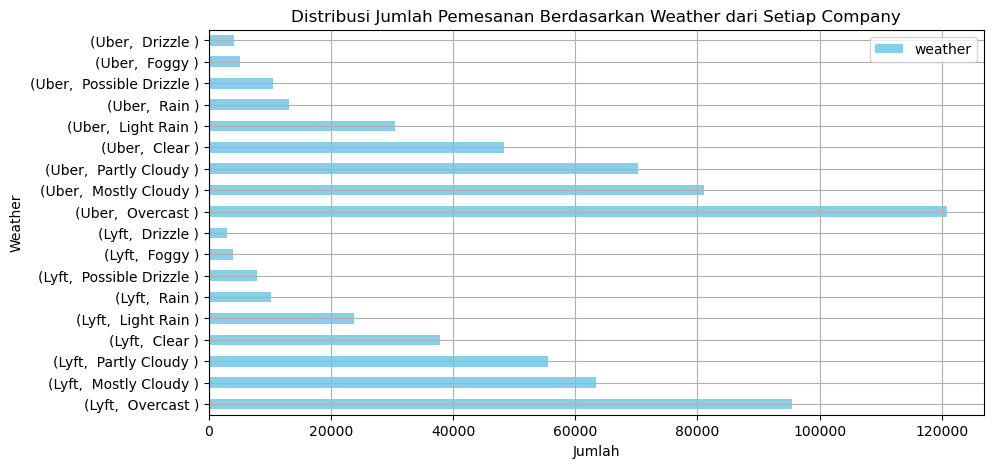

In [33]:
#Visualisasi untuk mengetahui distribusi jumlah pemesanan berdasaarkan weather dari setiap company
data_weather.plot(kind='barh', figsize=(10, 5), color='skyblue')
plt.title('Distribusi Jumlah Pemesanan Berdasarkan Weather dari Setiap Company')
plt.xlabel('Jumlah')
plt.ylabel('Weather')
plt.grid(True)
plt.xticks(rotation=0)

plt.show()

**Insight:**

- Jumlah pemesanan pada kondisi cuaca overcast meningkat dibandingkan pada cuaca lainnya.
- Jumlah pemesanan pada kondisi cuaca overcast yaitu Uber: 120837 dan Lyft: 95482.
- Jumlah pemesanan terendah pada saat kondisi cuaca drizzle.
- Jumlah pemesanan pada kondisi cuaca drizzle yaitu Uber: 4169 dan Lyft: 3056

---

## Measure of Central Tendency

In [34]:
# Mencari nilai rata rata (mean) harga dari kedua company tersebut
mean=new_data.groupby('company')['price'].mean()
print(mean)

company
Lyft    16.706367
Uber    15.747752
Name: price, dtype: float64


In [35]:
# Mengetahui nilai tengah (median) dari atribut jarak pada pemesanan transportasi online
new_data['distance'].median()

2.14

In [36]:
# Mengetahui company mana yang paling sering dipesan.
new_data['company'].mode()

0    Uber
Name: company, dtype: object

**Insight Measure of central tandency**
- Rata Rata harga dari masing masing company yaitu: company Lyft sekitar 16,70 USD sedangkan company Uber hanya sekitar 15,74 USD.
- dari nilai harga rata rata, companyy uber memiliki tarif yang lebih murah dibandingkan dengan lyft.
- nilai tengah(median) dari atribut jarak pada pemesanan transportasi online yaitu **2.14**
- Company yang memiliki jumlah pemesanan terbanyak atau yang paling sering di pesan oleh pengguna yaitu company Uber.

---

## Measure of Spread

In [37]:
#range price transportasi online uber
uber = new_data[new_data['service'].str.contains('uber', case=False)][['service', 'price']]
min_uber = uber['price'].min()
max_uber = uber['price'].max()

#range price transportasi online lyft
lyft = new_data[new_data['service'].str.contains('lyft', case=False)][['service', 'price']]
min_lyft = lyft['price'].min()
max_lyft = lyft['price'].max()

print(min_uber, max_uber)
print(min_lyft, max_lyft)

4.5 41.5
5.0 38.5


In [38]:
#mengetahui ukuran penyebaran data distance melalui standar deviasi
standard = new_data['distance'].std()
print(standard)

1.1155652370441829


**Insight Measure of Spread:** 
- Range tarif harga uber sekitar 4.5 USD hingga 41.5 USD sedangkan range tarif harga lyft sekitar 5.0 USD hingga 38.5 USD.
- Hasil pengukuran penyebaran data pada atribut distance melalui standard deviasi yaitu memiliki nilai sebesar 1.1155652370441829.

---

## Data PreProcessing

In [39]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encode_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns=['datetime', 'company', 'service', 'source', 'destination', 'weather', 'route']))
])

#Membuat variabel endcode_data untuk menampung hasil encode
encode_data = encode_pipeline.fit_transform(new_data)

In [40]:
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684866 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              684866 non-null  int64  
 1   day               684866 non-null  int64  
 2   month             684866 non-null  int64  
 3   datetime          684866 non-null  int32  
 4   company           684866 non-null  int32  
 5   service           684866 non-null  int32  
 6   source            684866 non-null  int32  
 7   destination       684866 non-null  int32  
 8   distance          684866 non-null  float64
 9   price             684866 non-null  float64
 10  temperature       684866 non-null  float64
 11  weather           684866 non-null  int32  
 12  surge_multiplier  684866 non-null  float64
 13  route             684866 non-null  int32  
dtypes: float64(4), int32(7), int64(3)
memory usage: 60.1 MB


In [41]:
encode_data.head()

,hour,day,month,datetime,company,service,source,destination,distance,price,temperature,weather,surge_multiplier,route
0,9,16,12,25351,0,7,5,7,0.44,5.0,42.34,4,1.0,33
1,2,27,11,961,0,2,5,7,0.44,11.0,43.58,8,1.0,33
2,1,28,11,2534,0,5,5,7,0.44,7.0,38.33,0,1.0,33
3,4,30,11,6988,0,4,5,7,0.44,26.0,34.38,0,1.0,33
4,3,29,11,4400,0,6,5,7,0.44,9.0,37.44,6,1.0,33


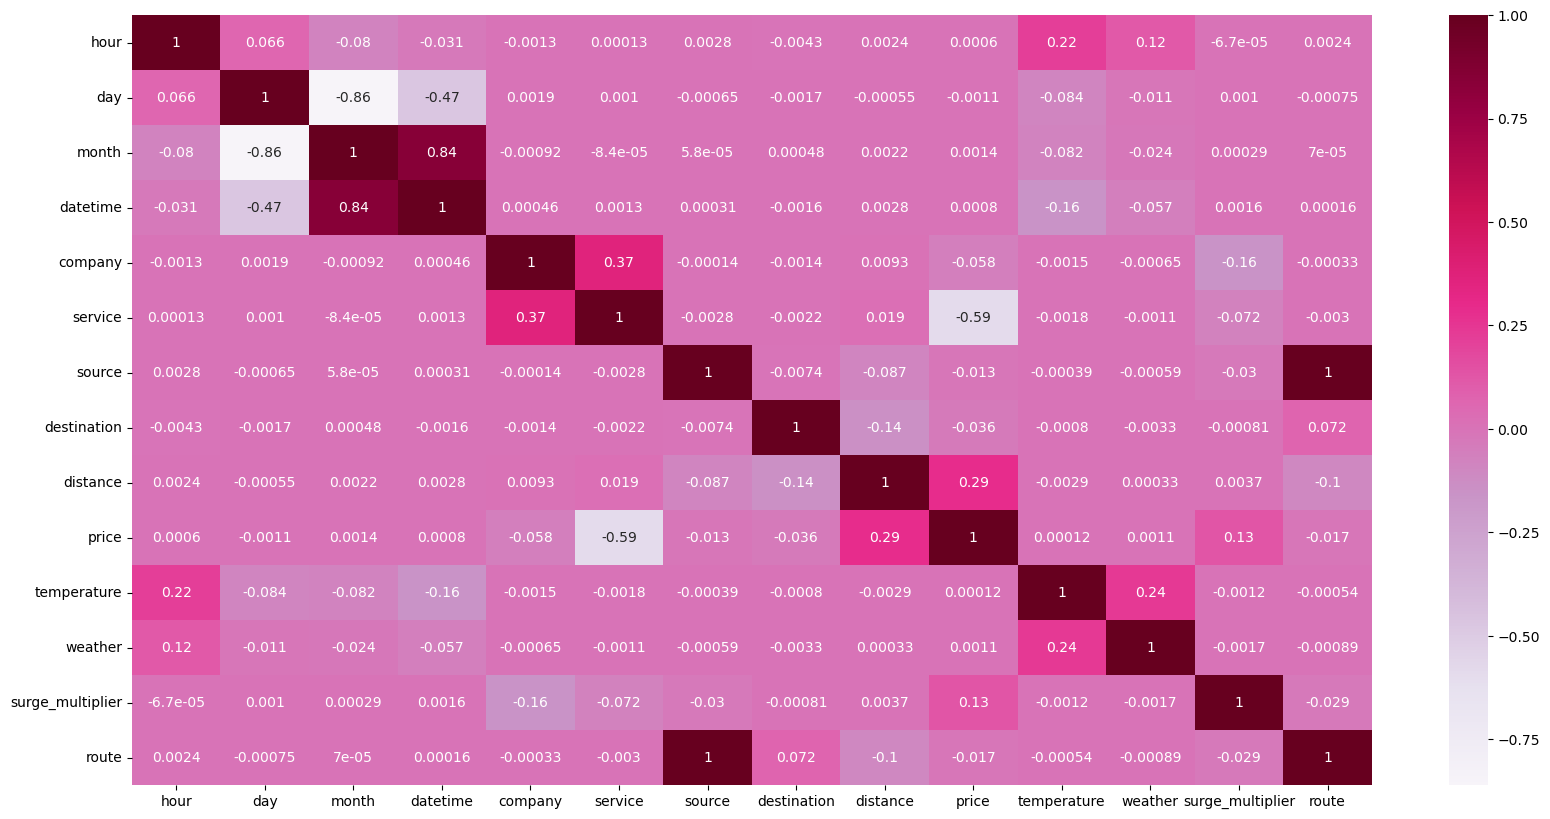

In [42]:
plt.figure(figsize=(20, 10))
sns.heatmap(encode_data.corr(), annot=True, cmap='PuRd')
plt.show()

In [43]:
encode_data.corr()

,hour,day,month,datetime,company,service,source,destination,distance,price,temperature,weather,surge_multiplier,route
hour,1.000000,0.066251,-0.079533,-0.031463,-0.001251,0.000134,0.002769,-0.004319,0.002403,0.000602,0.218801,0.120191,-0.000067,0.002377
day,0.066251,1.000000,-0.861316,-0.474383,0.001887,0.001000,-0.000646,-0.001741,-0.000553,-0.001090,-0.084235,-0.011108,0.000998,-0.000752
month,-0.079533,-0.861316,1.000000,0.843572,-0.000919,-0.000084,0.000058,0.000484,0.002232,0.001397,-0.081701,-0.024276,0.000291,0.000070
datetime,-0.031463,-0.474383,0.843572,1.000000,0.000464,0.001255,0.000310,-0.001627,0.002796,0.000802,-0.160874,-0.056886,0.001640,0.000162
company,-0.001251,0.001887,-0.000919,0.000464,1.000000,0.367352,-0.000142,-0.001373,0.009301,-0.057537,-0.001533,-0.000649,-0.156553,-0.000330
service,0.000134,0.001000,-0.000084,0.001255,0.367352,1.000000,-0.002788,-0.002236,0.018665,-0.591850,-0.001758,-0.001101,-0.072374,-0.003016
source,0.002769,-0.000646,0.000058,0.000310,-0.000142,-0.002788,1.000000,-0.007412,-0.086730,-0.013237,-0.000393,-0.000594,-0.029559,0.996617
destination,-0.004319,-0.001741,0.000484,-0.001627,-0.001373,-0.002236,-0.007412,1.000000,-0.143250,-0.035993,-0.000798,-0.003320,-0.000811,0.071612
distance,0.002403,-0.000553,0.002232,0.002796,0.009301,0.018665,-0.086730,-0.143250,1.000000,0.290705,-0.002923,0.000331,0.003696,-0.100842
price,0.000602,-0.001090,0.001397,0.000802,-0.057537,-0.591850,-0.013237,-0.035993,0.290705,1.000000,0.000124,0.001054,0.129960,-0.017058


Pada korelasi diatas menunjukkan bahwa atribut 'source' dan atribut 'price' memiliki hubungan yang serupa, maka dari itu, untuk menghindari multikolinearitas diperlukan penghapusan dari salah satu atribut tersebut, kami memilih untuk menghapus atribut route.

In [44]:
del encode_data['route']

In [45]:
encode_data.head(3)

,hour,day,month,datetime,company,service,source,destination,distance,price,temperature,weather,surge_multiplier
0,9,16,12,25351,0,7,5,7,0.44,5.0,42.34,4,1.0
1,2,27,11,961,0,2,5,7,0.44,11.0,43.58,8,1.0
2,1,28,11,2534,0,5,5,7,0.44,7.0,38.33,0,1.0


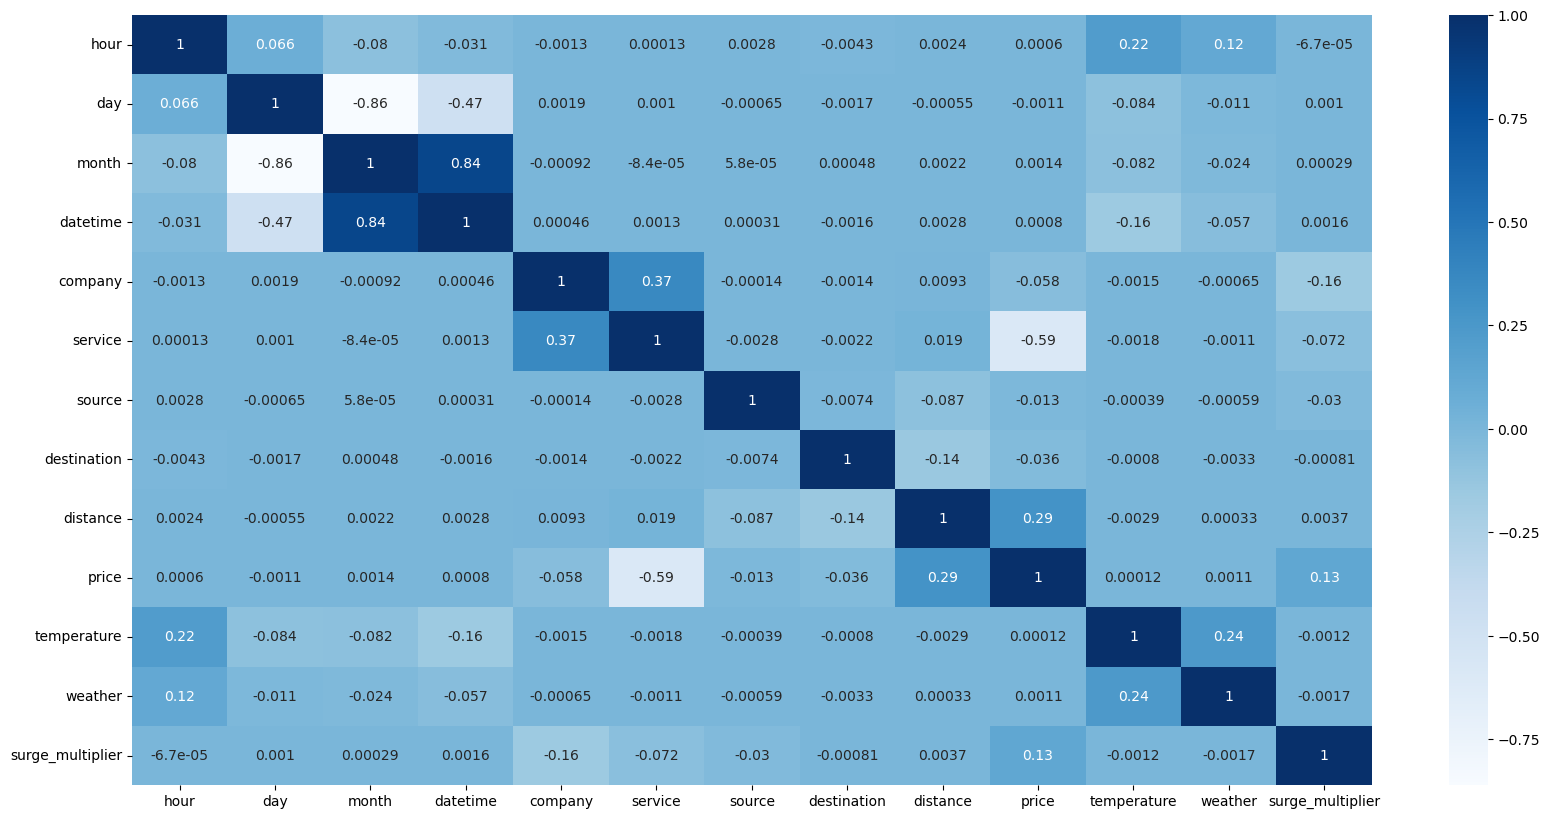

In [46]:
plt.figure(figsize=(20, 10))
sns.heatmap(encode_data.corr(), annot=True, cmap='Blues')
plt.show()

### Feature Selection

In [47]:
transform = encode_data.drop(['price'], axis=1)
print(transform.shape)

(684866, 12)


In [48]:
y = encode_data['price']
print(y.shape)

(684866,)


selanjutnya melakukan pemilihan fitur(feature selection) dalam analisis data, dengan tujuan untuk mengidentifikasi dan mempertahankan 10 fitur terbaik dari data berdasarkan relevansi mereka terhadap variabel target(y).

In [49]:
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(transform, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(transform.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print("best 10 features are")
print(featureScores.nlargest(10,'Score'))

best 10 features are
               Specs          Score
5            service  369238.045650
8           distance   63220.181278
11  surge_multiplier   11765.751602
4            company    2274.774621
7        destination     888.365121
6             source     120.028983
2              month       1.336968
1                day       0.813088
10           weather       0.760768
3           datetime       0.440909


Dari ke-10 feature tersebut akan dijadikan sebagai variable X, yang dimana data fitur tersebut akan dilakukan pemisahan data atau data splitting dengan pembagian 70% data untuk training dan 20% data untuk testing.

In [50]:
X=encode_data[['day', 'month', 'datetime', 'company', 'service','source', 'destination', 'distance', 'surge_multiplier' ,'weather']]
X.head(3)

,day,month,datetime,company,service,source,destination,distance,surge_multiplier,weather
0,16,12,25351,0,7,5,7,0.44,1.0,4
1,27,11,961,0,2,5,7,0.44,1.0,8
2,28,11,2534,0,5,5,7,0.44,1.0,0


---
## Data Modelling

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Melatih dan Evaluasi Model Linear Regression

In [52]:
#Melatih Model Linear Regression
model_lr = LinearRegression()

In [53]:
#Evaluasi Model Linear Regression
model_lr.fit(X_train, y_train)

LinearRegression()

In [54]:
print('intercept:', model_lr.intercept_)

feature_score = model_lr.coef_
print('slope:', feature_score)

intercept: 3.740830351335184
slope: [ 4.70001130e-03  1.84475254e-01 -4.55703807e-06  3.34850642e+00
 -1.44819738e+00  3.60126971e-02  1.39841788e-02  2.24708970e+00
  1.19183815e+01  3.86944163e-03]


In [55]:
y_pred_lr = model_lr.predict(X_test)
y_pred_lr

array([16.69709688, 11.00955517, 10.67323389, ..., 22.61564107,
       27.54326497, 11.88744131])

In [56]:
print('Linear Regression train R-squared : %.4f' % model_lr.score(X_train, y_train))
print('Linear Regression test R-squared : %.4f' % model_lr.score(X_test, y_test))

Linear Regression train R-squared : 0.4831
Linear Regression test R-squared : 0.4833


In [57]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r_squared_lr = r2_score(y_test, y_pred_lr)
print(f'Mean Squared Error (MSE): {mse_lr:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_lr:.2f}')
print(f'R-squared (Coefficient of Determination): {r_squared_lr:.2f}')

Mean Squared Error (MSE): 35.22
Root Mean Squared Error (RMSE): 5.93
R-squared (Coefficient of Determination): 0.48


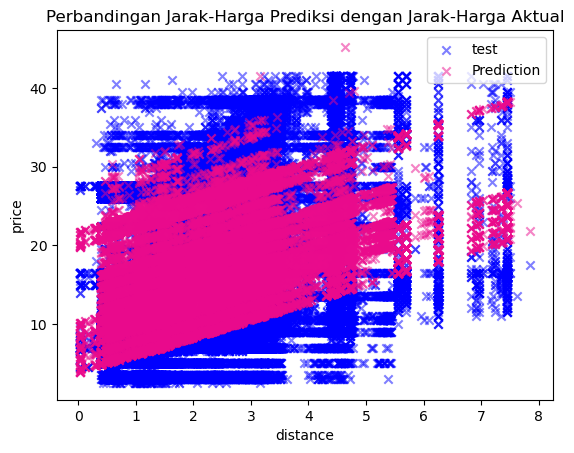

In [58]:
x_axis = X_test.distance 

plt.scatter(x_axis, y_test, c='blue', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, y_pred_lr, c='#EA0B8C', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual")
plt.legend(loc = 'upper right')
plt.show()

**Insight:** Modelling menggunakan algoritma linear regression memiliki nilai akurasi sebesar 48% dengan tingkat error MSE: 35% dan RMSE:5.9%

---

### Melatih dan Evaluasi Model Random Forest Regressor

In [59]:
#Melatih Model Random Forest Regressor
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [60]:
#Evaluasi model Random Forest Regressor
model_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
y_pred_rfr = model_rfr.predict(X_test)

In [62]:
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print(f'Mean Squared Error (MSE): {mse_rfr:.2f}')
print(f'R-squared (Coefficient of Determination): {r2_rfr:.2f}')

Mean Squared Error (MSE): 2.72
R-squared (Coefficient of Determination): 0.96


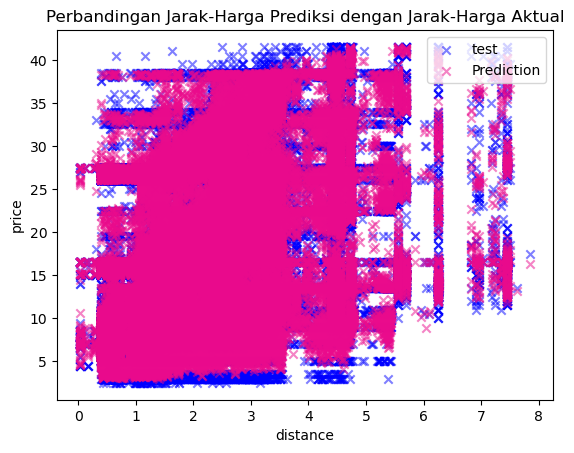

In [63]:
x_axis = X_test.distance 

plt.scatter(x_axis, y_test, c='blue', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, y_pred_rfr, c='#EA0B8C', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual")
plt.legend(loc = 'upper right')
plt.show()

**Insight:** Modelling menggunakan algoritma Random Forest Regressor memiliki nilai akurasi sebesar 96% dengan tingkat error MSE: 2.7%

---
---

**INSIGHT KESELURUHAN:**

1. Terdapat 57 atribut dan dimana hanya terdapat beberapa atribut saja yang relevan, maka dari itu kami memilih 13 atribut, diantaranya yaitu: hour, day, month, datetime, name, cab_type, source, destination, distance, price, temperatur, short_summary dan surge_multiplier. serta membuat 1 atribut route yang merupakan gabungan dari atribut source dan destination.
2. Melakukan penggantian nama atribut seperti atribut cab_type menjadi company, name menjadi service dan short_summary menjadi weather.
3. Visualisasi yang kami gunakan hanya 2 jenis grafik yaitu, visualisasi bar chart (vertikal & horizontal) dan visualisasi pie chart.  
    - Visualisasi pie chart kami gunakan untuk mengetahui perbandingan jumlah pengguna dari masing masing company dalam bentuk persentase yang dimana hasil visualisasi menunjukkan bahwa company uber 56% sedangkan company lyft hanya sekitar 44%.
    - Visulisasi bar baik dalam bentuk vertikal atau horizontal, kami gunakan untuk menghitung jumlah pengguna antara company uber dan lyft, distribusi layanan (service) dari setiap company, serta distribusi jumlah pemesanan berdasarkan cuaca (weather).
3. Dalam menentukan hasil prediksi harga tarif transportasi online kami memnggunakan algoritma linear regression dan algoritma random forest regressor sebagai pembanding nilai akurasi.
    - Pemodelan menggunakan algoritma Linear Regression menghasilkan nilai akurasi sebesar 48%, yang mengindikasikan bahwa model mampu memprediksi variabel target dengan tingkat keakuratan tersebut. Namun, perlu dicatat bahwa tingkat error Mean Squared Error (MSE) sebesar 35% dan Root Mean Squared Error (RMSE) sebesar 5.9% cukup tinggi. MSE dan RMSE mengukur seberapa besar selisih antara nilai prediksi dan nilai sebenarnya, dan nilai yang tinggi menandakan bahwa model memiliki tingkat kesalahan yang cukup besar dalam memprediksi data.
    - Pemodelan menggunakan algoritma Random Forest Regressor menghasilkan nilai akurasi sebesar 96%, mencerminkan kemampuan model untuk memprediksi variabel target dengan tingkat keakuratan yang sangat tinggi. Selain itu, tingkat error Mean Squared Error (MSE) sebesar 2.7% menandakan bahwa prediksi model memiliki tingkat kesalahan yang rendah, sehingga mendekati nilai sebenarnya dengan baik.

Dari kedua algoritma tersebut, algoritma yang lebih direkomendasikan untuk memprediksi harga tarif transportasi online adalah Random Forest Regressor. Alasan utama untuk merekomendasikan Random Forest Regressor adalah performa yang jauh lebih tinggi dalam hal nilai akurasi dibandingkan dengan Linear Regression, serta tingkat error yang lebih rendah. Akurasi yang tinggi (96%) menunjukkan bahwa model Random Forest Regressor dapat dengan baik memprediksi nilai target pada dataset yang digunakan. Tingkat error Mean Squared Error (MSE) yang rendah menandakan bahwa prediksi model memiliki kesalahan yang minim, sehingga mendekati nilai sebenarnya. Random Forest Regressor juga memiliki kemampuan untuk mengatasi overfitting, yang dapat terjadi pada model yang terlalu kompleks. Ini karena model Random Forest menggabungkan beberapa decision trees dan melakukan averaging atau voting, yang dapat menghasilkan model yang lebih stabil.


---
---
